## 6.1 依赖和独立

事件E和事件F同时发生的概率等于它们分别发生的概率的乘积 —— 事件E与事件F相互独立

> P(E,F) = P(E)P(F)

## 6.2 条件概率

事件E“关于事件F”的条件概率：

> P(E|F) = P(E，F)/P(F)

反过来事件F关于事件E的条件概率

> P(F|E) = P(F,E)/P(E)

In [3]:
# 示例代码

import enum,random

# Enum生成枚举值的集合

class Kid(enum.Enum):
    BOY = 0
    GIRL = 1
    
def random_kid() -> Kid:
    return random.choice([Kid.BOY,Kid.GIRL])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == Kid.GIRL:
        older_girl += 1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1
        
print("P(both | older):", both_girls / older_girl) # 0.514 ~ 1/2
print("P(both | either): ", both_girls / either_girl) # 0.342 ~ 1/3

P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325


## 6.3 贝叶斯定理

贝叶斯定理的核心是：“逆转”条件概率，通过已知的信息推导出未知的概率

> P(E|F) = P(E,F)/P(F) = P(F|E)P(E)/P(F)

将事件F拆分为两个互斥事件：F和E同时发生，F发生而E不发生

> P(F) = P(E,F) + P(E,-E)

贝叶斯定理常见表达式：

> P(E|F) = P(F|E)P(E)/ [P(F|E)P(E) + P(F|-E)P(-E)]

## 6.4 随机变量

对随机性的抽象表示

## 6.5 连续分布

1. **离散分布：** 针对离散值的概率分布，每个值都有明确的概率。

2. **均匀分布：** 所有值在一定范围内具有相同的概率密度。

    - **概率密度函数（PDF）：** 描述每个值上的概率密度，对于均匀分布是常数。
    
    
    - **累积分布函数（CDF）：** 表示小于等于某个值的累积概率，对于均匀分布是线性递增的。

## 6.6 正态分布

### 6.6.1 正态分布的概率密度函数

1. 参数：

- 均值μ（mu）——中心位置

- 标准差 σ（sigma）——宽度

2. 公式：

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$


3. 代码实现：

In [4]:
import math
SQRT_TWO_PI = math.sqrt(2 * math.pi)

def normal_pdf(x:float, mu:float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

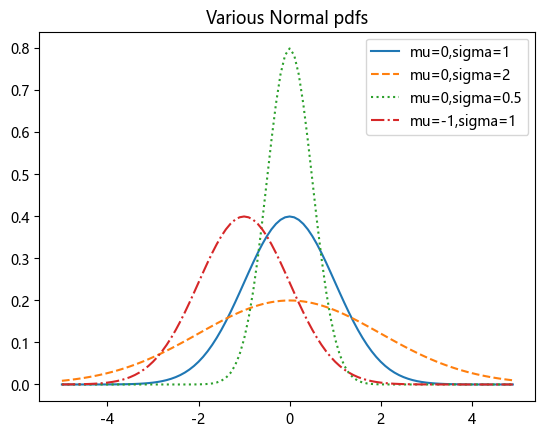

In [9]:
# 绘制一些概率密度函数

import matplotlib.pyplot as plt

xs = [x / 10.0 for x in range(-50,50)]

plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs], '-',label = 'mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1') 

plt.legend()
plt.title("Various Normal pdfs")
plt.show()

**4. 标准正太分布**

- μ= 0，σ=1

**正态分布与标准正态分布之间的转换：**

如果 Z 是服从标准正态分布的随机变量，那么会有以下关系：
$$
X = σZ + μ
$$

其中 X 是正态分布，但均值是 μ，标准差是 σ。

相反，如果 X 是有均值 μ 和标准差 σ 的正态随机变量，则:
$$
Z = (X – μ) /σ
$$


*这个公式揭示了正态分布的一个重要特性，即正态分布可以通过线性变换来转换成不同均值和标准差的正态分布，甚至可以从标准正态分布转换而来。*

### 6.6.2 正态分布的累积分布函数

正态分布的累积分布函数（Cumulative Distribution Function，CDF）是一个统计函数，描述随机变量在某个值之前的累积概率。
对于正态分布，它的累积分布函数没有一个简单的闭式形式，但可以使用特殊函数来表示，其中最常见的是误差函数（python中是math.erf）

公式表示为：

$$
\Phi(x) = \frac{1}{2} \left(1 + \text{erf}\left(\frac{x - \mu}{\sigma \sqrt{2}}\right)\right)
$$


In [11]:
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
 return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

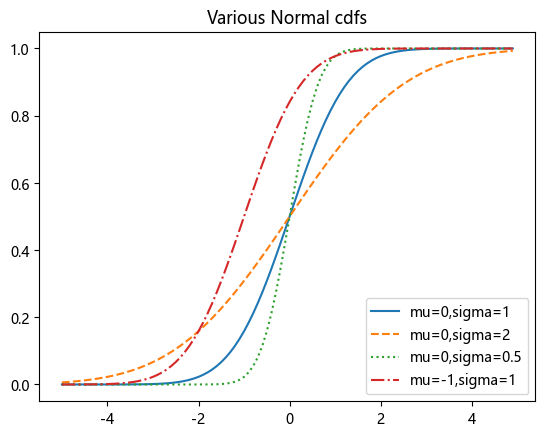

In [12]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # 底部右边
plt.title("Various Normal cdfs")
plt.show()

对 normal_cdf 进行逆运算(寻找特定概率的值）——二分查找

In [16]:
def inverse_normal_cdf(p: float,
 mu: float = 0,
 sigma: float = 1,
 tolerance: float = 0.00001) -> float:
    """使用二分搜索找到近似逆"""
    # 如果不是标准正态分布，先调整至标准正态分布
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z = -10.0 # normal_cdf(-10)是（非常接近）0
    hi_z = 10.0 # normal_cdf(10) 是（非常接近）1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2 #考虑中点
        mid_p = normal_cdf(mid_z) # 考虑对应的CDF值
        if mid_p < p:
            low_z = mid_z # 中点太低 搜索更大的值
        else:
            hi_z = mid_z # 中点太高，搜索更小的值
            
        return mid_z

## 6.7 中心极限定理

**当我们多次取样同一个群体时，这些样本的平均值会趋近于一个特殊的分布，叫做正态分布（也叫高斯分布）**
换言之，当我们累积许多独立的随机事件的平均值时，这些平均值的分布会趋向于正态分布。

下述公式描述了如何**从总体中取样本并对其进行标准化，使得样本平均值的分布逐渐趋近于正态分布：**

$$
\frac{(\sum_{i=1}^{n} x_i - \mu n)}{\sigma \sqrt{n}}
$$

二项式随机变量：Binomial(n,p)——n个独立伯努利（p）随机变量的总和，每个伯努利随机变量等于 1的概率为 p，等于 0 的概率是 1 – p

In [18]:
def bernoulli_trial(p:float) -> int:
    """返回1的概率为p，返回0的概率为1-p"""
    return 1 if random.random() < p else 0

def binomial(n:int, p:float) -> int:
    """返回n的伯努利（p）实验结果的和"""
    return sum(bernoulli_trial(p) for _ in range(n))

1. 伯努利随机变量的均值是 p，标准差是 √(p(1-p))。伯努利随机变量是一种描述单次试验成功或失败的随机变量，成功的概率是 p，失败的概率是 (1-p)。

2. 中心极限定理指出，当你对大量独立的伯努利试验结果进行求和（即进行二项式试验，Binomial(n, p)），随着试验次数 n 的增大，这些和的分布会逐渐趋近于正态分布。在这个正态分布中，**均值 μ 等于 np，标准差 σ 等于 √(np(1-p))。**

In [30]:
from collections import Counter

def binomial_histogram(p:float, n:int, num_points:int) -> None:
    """在一个Binomial(n, p)分布中取点，并绘制直方图"""
    data = [binomial(n,p) for _ in range(num_points)] # 取出样本
    
    # 用条形态画出实际的二项式样本
    histogram = Counter(data)
    plt.bar([x-0.4 for x in histogram.keys()], #调整便宜
           [v / num_points for v in histogram.values()],# 计算频率
            0.8,
            color = '0.75')
    
    # 计算mu和sigma
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    
    # 用线条画出正态近似
    xs = range(min(data),max(data)+1)
    ys = [normal_cdf(i+0.5,mu,sigma) - normal_cdf(i-0.5,mu,sigma) for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()

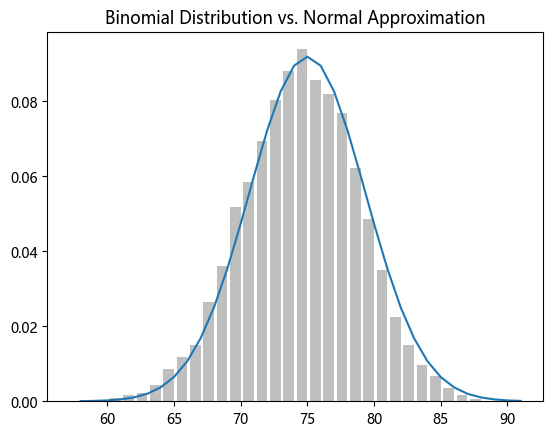

In [31]:
binomial_histogram(0.75, 100, 10000)

这种近似的意义是，如果你想知道（比方说）掷一枚均匀的硬币 100 次，正面朝上超过 60
次的概率，那么可以通过**正态分布 Normal(50, 5) 的随机变量大于 60 的概率**来估计，这比
计算二项式分布 Binomial(100, 0.5) 的累计分布函数更容易。尽管在大部分实际应用中，可
以借助统计软件快速方便地计算出任何你想要的概率。